In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')
data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [4]:
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem())

0 2812 0.44345661450924606 0.009370109336123865
1 14 0.5714285714285714 0.13725270326150324
2 2313 0.3852140077821012 0.01012089927190472
3 2672 0.8087574850299402 0.007609645680958997
4 1704 0.4014084507042254 0.011878216105764141
5 833 0.1908763505402161 0.013624539924512919
6 1718 0.5285215366705471 0.012046950521125577
7 89 0.34831460674157305 0.05078827950334113
8 2327 0.3919209282337774 0.010122188032315182
9 834 0.36330935251798563 0.016664029411268565
10 1572 0.4020356234096692 0.012370345562832924
11 2171 0.45831414094887146 0.010696101386212253
12 1701 0.3991769547325103 0.011877678361556359
13 1259 0.6965845909451946 0.012961803326362792
14 1697 0.6682380671773719 0.011433151502268899
15 4 0.5 0.28867513459481287
16 2300 0.5834782608695652 0.010281623364912677
17 848 0.42924528301886794 0.017007317337094298
18 2173 0.3175333640128854 0.009988619831022786
19 2692 0.6355869242199108 0.009277428244661849
20 1707 0.6338605741066198 0.011663545946428995
21 137 0.40875912408759124

In [5]:
grouped_data = data.groupby('QuestionId').agg(
    count = pd.NamedAgg(column='IsCorrect', aggfunc='count'),
                mean = pd.NamedAgg(column='IsCorrect', aggfunc='mean')
            ).reset_index()

grouped_data.head()

,QuestionId,count,mean
0,0,2812,0.443457
1,1,14,0.571429
2,2,2313,0.385214
3,3,2672,0.808757
4,4,1704,0.401408


<AxesSubplot:>

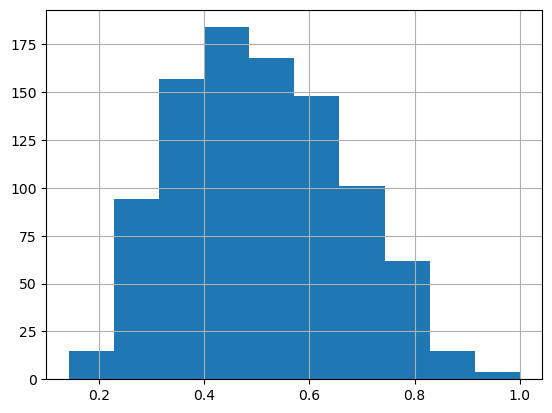

In [6]:
grouped_data['mean'].hist()

<AxesSubplot:>

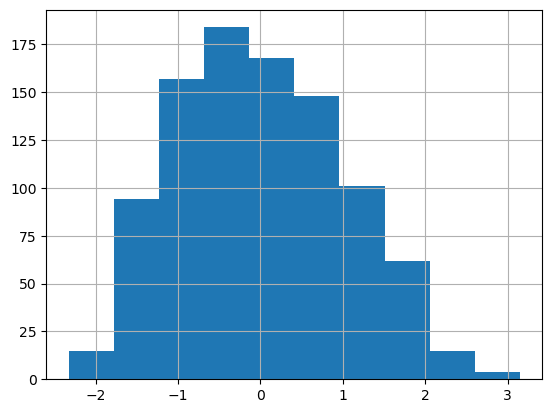

In [7]:
df = grouped_data

grouped_data['zscore'] = (df['mean'] - np.mean(df['mean'])) / np.std(df['mean'])

grouped_data['zscore'].hist()

In [8]:
grouped_data

,QuestionId,count,mean,zscore
0,0,2812,0.443457,-0.405919
1,1,14,0.571429,0.411018
2,2,2313,0.385214,-0.777723
3,3,2672,0.808757,1.926059
4,4,1704,0.401408,-0.674342
...,...,...,...,...
943,943,2653,0.566528,0.379737
944,944,189,0.142857,-2.324861
945,945,2337,0.422336,-0.540745
946,946,111,0.459459,-0.303761


In [9]:
# sort
zsort = grouped_data.sort_values(by='zscore', ascending=True)

zsort.head()

,QuestionId,count,mean,zscore
944,944,189,0.142857,-2.324861
931,931,1702,0.160400,-2.212875
155,155,1675,0.164776,-2.184937
425,425,78,0.179487,-2.091025
718,718,658,0.183891,-2.062915


<AxesSubplot:>

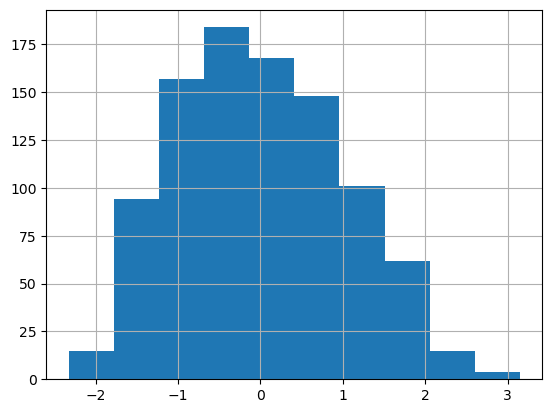

In [10]:
zsort['score'] = zsort['zscore'].rank(ascending=True)

zsort['zscore'].hist()

In [11]:
score_sort = zsort.sort_values(by='zscore', ascending=False)

score_sort

,QuestionId,count,mean,zscore,score
847,847,4,1.000000,3.146897,947.0
660,660,6,1.000000,3.146897,947.0
841,841,4,1.000000,3.146897,947.0
924,924,2379,0.923497,2.658525,945.0
422,422,144,0.895833,2.481927,944.0
...,...,...,...,...,...
718,718,658,0.183891,-2.062915,5.0
425,425,78,0.179487,-2.091025,4.0
155,155,1675,0.164776,-2.184937,3.0
931,931,1702,0.160400,-2.212875,2.0


<AxesSubplot:xlabel='QuestionId', ylabel='count'>

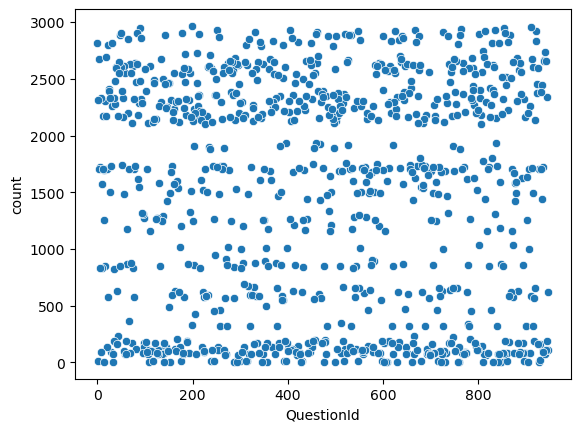

In [12]:
plt.figure()
sns.scatterplot(data=score_sort, x=score_sort['QuestionId'], y=score_sort['count'])

<AxesSubplot:xlabel='QuestionId', ylabel='score'>

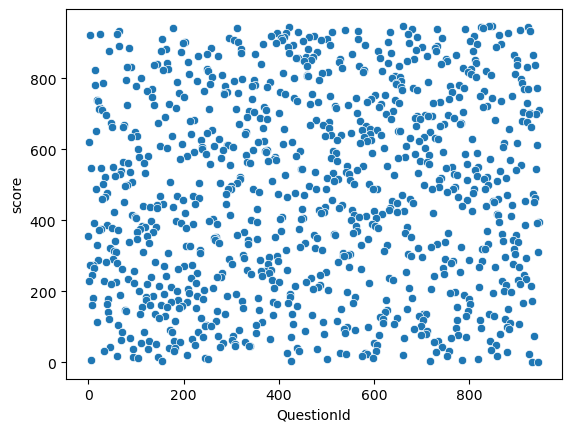

In [13]:
plt.figure()
sns.scatterplot(data=score_sort, x=score_sort['QuestionId'], y=score_sort['score'])

<AxesSubplot:xlabel='count', ylabel='score'>

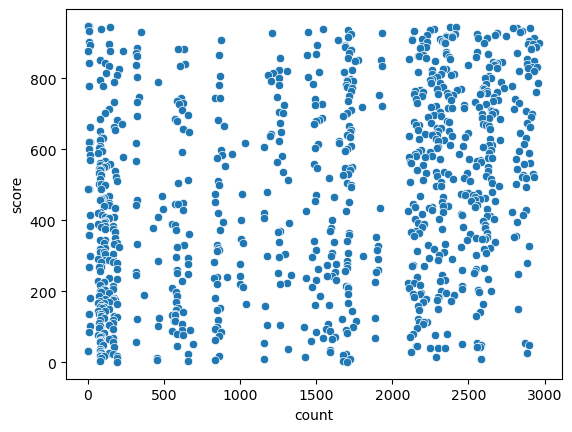

In [14]:
plt.figure()
sns.scatterplot(data=score_sort, x=score_sort['count'], y=score_sort['score'])

In [15]:
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
eval_validation.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


In [16]:
eval_validation['1count'] = (eval_validation[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 1).sum(axis=1)
eval_validation['2count'] = (eval_validation[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 2).sum(axis=1)

eval_validation.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,1count,2count
0,0,0,909,318,2,2,2,1.0,2,1,4
1,16,16,285,609,2,2,2,2.0,2,0,5
2,48,48,132,271,1,2,2,2.0,1,2,3
3,38,38,704,127,2,2,1,2.0,2,1,4
4,33,33,16,586,1,1,2,2.0,2,2,3


In [17]:
left = eval_validation['left']
right = eval_validation['right']

l_score = eval_validation['1count']/5*1.3
r_score = eval_validation['2count']/5*1.3

test = pd.DataFrame({'QuestionId': pd.concat([left, right]),
                    'score': pd.concat([l_score, r_score])})

test.head()

,QuestionId,score
0,909,0.26
1,285,0.00
2,132,0.52
3,704,0.26
4,16,0.52


left = eval_validation['left']
right = eval_validation['right']

l_score = (1 - eval_validation['score']/2) * 1.5
r_score = (eval_validation['score']/2) * 1.5

test = pd.DataFrame({'QuestionId': pd.concat([left, right]),
                    'score': pd.concat([l_score, r_score])})

test

In [18]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


In [19]:
# take the average of 5 evaulators` scores
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score
0,15,15,145,762,2,2,2,2.0,2,2.0
1,31,31,307,208,1,1,1,2.0,1,1.2
2,25,25,278,195,1,1,1,1.0,1,1.0
3,3,3,13,153,2,2,2,2.0,2,2.0
4,40,40,23,100,2,1,1,1.0,1,1.2


In [20]:
eval_test['1count'] = (eval_test[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 1).sum(axis=1)
eval_test['2count'] = (eval_test[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 2).sum(axis=1)

eval_test

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,1count,2count
0,15,15,145,762,2,2,2,2.0,2,2.00,0,5
1,31,31,307,208,1,1,1,2.0,1,1.20,4,1
2,25,25,278,195,1,1,1,1.0,1,1.00,5,0
3,3,3,13,153,2,2,2,2.0,2,2.00,0,5
4,40,40,23,100,2,1,1,1.0,1,1.20,4,1
5,23,23,532,104,1,1,2,2.0,1,1.40,3,2
6,21,21,155,479,1,1,1,1.0,2,1.20,4,1
7,1,1,304,907,1,1,1,1.0,1,1.00,5,0
8,26,26,242,129,1,1,1,1.0,1,1.00,5,0
9,39,39,688,287,2,1,2,2.0,2,1.80,1,4


```
left = eval_test['left']
right = eval_test['right']

l_score = (1 - eval_test['score']/2) * 1.5
r_score = (eval_test['score']/2) * 1.5

ptest = pd.DataFrame({'QuestionId': pd.concat([left, right]),
                    'score': pd.concat([l_score, r_score])})

ptest.head()
```

In [21]:
left = eval_test['left']
right = eval_test['right']

l_score = eval_test['1count']/5*1.3
r_score = eval_test['2count']/5*1.3

ptest = pd.DataFrame({'QuestionId': pd.concat([left, right]),
                    'score': pd.concat([l_score, r_score])})

ptest.head()

,QuestionId,score
0,145,0.00
1,307,1.04
2,278,1.30
3,13,0.00
4,23,1.04


In [22]:
merge = pd.concat([test, ptest])
merge

,QuestionId,score
0,909,0.26
1,285,0.00
2,132,0.52
3,704,0.26
4,16,0.52
...,...,...
20,428,1.04
21,836,0.52
22,381,0.78
23,223,0.00


In [23]:
df2 = score_sort
df1 = merge

df_merged = df2.join(df1.set_index('QuestionId'), on='QuestionId', how='left', rsuffix='_df1')
df_merged['score'] = df_merged['score'] + df_merged['score_df1'].fillna(0)
df_merged = df_merged.drop(columns='score_df1').drop_duplicates(subset='QuestionId')

df_merged

,QuestionId,count,mean,zscore,score
847,847,4,1.000000,3.146897,947.00
660,660,6,1.000000,3.146897,947.00
841,841,4,1.000000,3.146897,947.00
924,924,2379,0.923497,2.658525,945.00
422,422,144,0.895833,2.481927,944.00
...,...,...,...,...,...
718,718,658,0.183891,-2.062915,5.00
425,425,78,0.179487,-2.091025,4.00
155,155,1675,0.164776,-2.184937,4.04
931,931,1702,0.160400,-2.212875,2.00


In [24]:
df_merged['rank'] = df_merged['score'].rank(ascending=False)

df_merged

,QuestionId,count,mean,zscore,score,rank
847,847,4,1.000000,3.146897,947.00,2.0
660,660,6,1.000000,3.146897,947.00,2.0
841,841,4,1.000000,3.146897,947.00,2.0
924,924,2379,0.923497,2.658525,945.00,4.0
422,422,144,0.895833,2.481927,944.00,5.0
...,...,...,...,...,...,...
718,718,658,0.183891,-2.062915,5.00,944.0
425,425,78,0.179487,-2.091025,4.00,946.0
155,155,1675,0.164776,-2.184937,4.04,945.0
931,931,1702,0.160400,-2.212875,2.00,947.0


In [25]:
result = df_merged.sort_values(by='rank', ascending=True)

result

,QuestionId,count,mean,zscore,score,rank
847,847,4,1.000000,3.146897,947.00,2.0
660,660,6,1.000000,3.146897,947.00,2.0
841,841,4,1.000000,3.146897,947.00,2.0
924,924,2379,0.923497,2.658525,945.00,4.0
422,422,144,0.895833,2.481927,944.00,5.0
...,...,...,...,...,...,...
718,718,658,0.183891,-2.062915,5.00,944.0
155,155,1675,0.164776,-2.184937,4.04,945.0
425,425,78,0.179487,-2.091025,4.00,946.0
931,931,1702,0.160400,-2.212875,2.00,947.0


<AxesSubplot:xlabel='mean', ylabel='score'>

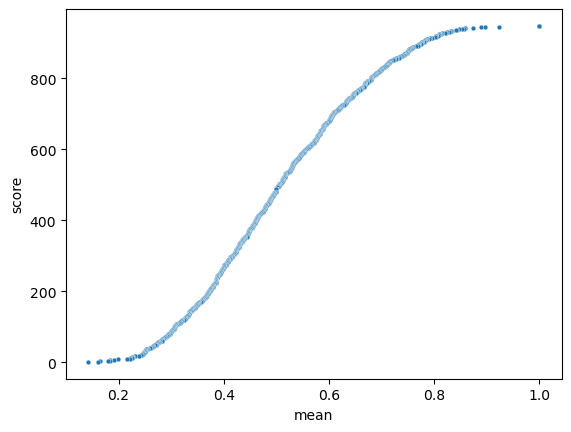

In [26]:
plt.figure()
sns.scatterplot(data=result, x=result['mean'], y=result['score'], s=12)

In [27]:
template = pd.read_csv('submission/template.csv')
template.head()

,QuestionId,ranking
0,0,594.0
1,1,329.5
2,2,721.0
3,3,27.0
4,4,676.0


In [28]:
df1 = result
df2 = template

merged_df = pd.merge(df2, df1[['QuestionId', 'rank']], on='QuestionId', how='left')
merged_df = merged_df.drop('ranking', axis=1)
merged_df = merged_df.rename(columns={'rank': 'ranking'})

merged_df

,QuestionId,ranking
0,0,594.0
1,1,329.5
2,2,721.0
3,3,27.0
4,4,676.0
...,...,...
943,943,336.0
944,944,948.0
945,945,639.0
946,946,554.0


In [29]:
merged_df.to_csv('submission/template.csv', index=False)

In [30]:
check = pd.read_csv('submission/template.csv')

check

,QuestionId,ranking
0,0,594.0
1,1,329.5
2,2,721.0
3,3,27.0
4,4,676.0
...,...,...
943,943,336.0
944,944,948.0
945,945,639.0
946,946,554.0
